# Task 1
## Prediction Using Supervised Learning
### This model predicts the percentage of a student on the basis of his/her's studied hours.
Algorithm used here is Simple Linear Regression.
  Accuracy Score is around 93%

### Done By : Aditya Yadav

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Analysing the Data 

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualization

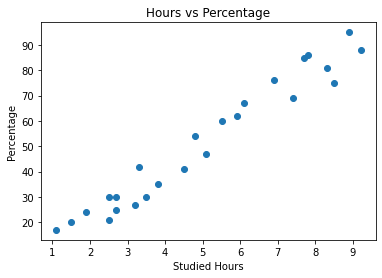

In [7]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Percentage')
plt.show()

### Regression Plot

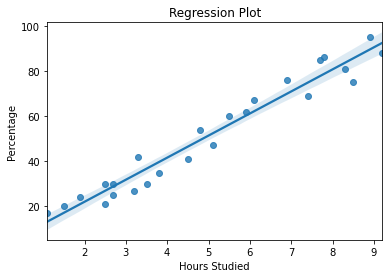

In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot')
plt.ylabel('Percentage')
plt.xlabel('Hours Studied')
plt.show()

### Correlation between Score and Hours

In [9]:
correlation = data.corr()

<AxesSubplot:>

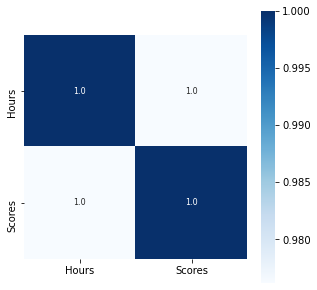

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Training the Model


In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.1, random_state = 42)

In [13]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) 

(22, 1) (3, 1) (22,) (3,)


In [14]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

### Predicted Marks

In [15]:
predict_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [j for j in predict_y]})
prediction

,Hours,Predicted Marks
0,8.3,83.897278
1,2.5,27.150923
2,2.5,27.150923


## Predicted Marks vs Actual Marks

In [16]:
compare_scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,81,83.897278
1,30,27.150923
2,21,27.150923


### Predicted Marks vs Actual Marks plot

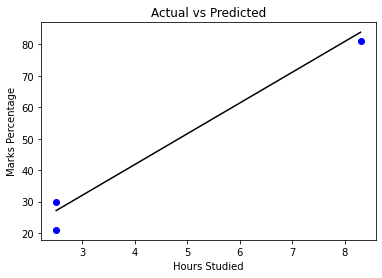

In [17]:
plt.scatter(x=X_test, y=Y_test, color='blue')
plt.plot(X_test, predict_y, color='Black')
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

## Evaluating the Model

In [18]:
print('Mean absolute error: ',mean_absolute_error(Y_test,predict_y))

Mean absolute error:  3.9657593887812133


In [19]:
hours = [9.25]
result = regression.predict([hours])
print("Accuracy Score = {}".format(round(result[0],2)))

Accuracy Score = 93.19


### So, if a student is studying for 9.25 hours per day then the student will score 93.19 percentage